# Workshop 5, Advanced AI - Statistics Module

Student: Ricardo Andrés Cáceres Villibord

Date: 23 de Agosto del 2023 

***Abstract***
- *In this workshop we practice the interpretation of simple regression and start with the multiple regression model.*

*Complete Workshop Instructions can be found at: https://rpubs.com/cdorante/tc3006c_w5*

### **3. Interpretation of beta coefficients**

In a simple regression model we have the independent variable (X or IV), and the dependent variable (Y or DV). We assume that we are interested on learning about the DV, and how it can change with changes in other, the IV.

In the simple regression model, we can provide a general interpretation of the beta coefficients as follows:

- **beta1** is the measure of linear relationship between the DV and the IV; if beta1>0, then, on average the linear relationship will be positive; if beta1<0, on average the linear relationship will be negative.

- **beta1** is a measure of sensitivity of the DV with changes in +1 unit of the IV. Then, beta1 is how much (on average), the DV moves if the IV moves in +1 unit. This is the reason why beta1 represents the slope of the regression line.

- **beta0** is the expected value of the DV when the IV=0. If beta0=0, then the regression line will pass by the origin (X=0, Y=0). beta0 is the intercept since it is the point in the Y axis where the regression line passes. beta0 defines how high or low the regression line will be.

It is easy to think that beta0 and beta1 are constants. However, beta0 and beta1 are constantly changing! they are random variables that can be expresses as a linear combination of the random variables X, Y and the error. Then, since beta0 and beta1 are linear combination of random variables, then according to the CLT, both will behave like a normal distributed variable with mean equal to their OLS estimated value and standard deviation equal to the OLS standard error.

It depends on the context of the variables of a regression model, the coefficients can give us interesting insights about the relationship between the variables.

For example, in the case of market regression model, the insights we can get from the beta coefficients are:

- beta1 is a measure of risk of the stock in relation with the market; it tells us how sensitive a stock return is when the market return moves:
  - If beta1=1 or is NOT significantly different than 1, this means that the stock is practically equally risky than the market;

  - if beta1>1 and is significantly bigger than 1, this means that the stock is significantly riskier than the market;

  - if beta1<1 and is significantly less than 1, this means that the stock is significantly less risky than the market;

  - if beta1=0 and is NOT significantly different than 0, this means that the stock is not significantly related to the market.

  - If beta0=0 and is NOT significantly different than 0, this means that the stock is NOT offering excess returns or less returns over the market; in other words, when the market returns=0, it is expected that the stock also will have returns=0.

  - if beta0>0 and is significantly greater than 0, this means that the stock is significantly offering returns over the market; in other words, the stock is significantly beating the market. it is supposed that according to the efficient hypothesis in financial markets, there is NO stock, instrument or portfolio that systematically beats the market.

  - if beta0<0 and is significantly less than 0, this means that the stock is significantly offering returns bellow the market

Level of significance of the beta coefficients

The regression output automatically performs hypothesis testing for the beta coefficients. One hypothesis test is performed for each beta coefficient.

The hypotheses for each test are:
- H0: beta = 0

- Ha: beta <> 0

Then, the t-Statistic and pvalues are estimated with this null value (beta=0). If we want to check whether beta1 is significantly >1, we CANNOT use the t-value nor the pvalue reported in the regression output! We can do our own test or we can use the 95% confidence interval reported in the regression output (if the value 1 is NOT included in the 95%C.I. this means that the beta1 is significantly different than 1).

The regression output reported by most statistical software includes the following for each beta coefficient:
- beta coefficient (OLS BLUE - Best, Linear, Unbiased estimator). It is the mean value of its 95% Confidence Interval

- Standard error (SE) - the standard deviation of the beta coefficient; it is the average movement or variability that the beta will have with new data

- t-Statistic or tvalue - the # of standard deviations of the coefficient that the estimated beta value is away from the zero (the null value)

- pvalue - the probability that I will be wrong if I reject the null hypothesis, which states that the beta = 0.

- 95% confidence interval - the minimum and maximum possible values that the beta can have 95% of the time when new observations are considered.

### **4. Interpreting coefficients with an example**

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Getting price data and selecting adjusted price columns:
stock_prices = yf.download(['ALFAA.MX','^MXX'],start="2018-01-01",interval="1mo")
stock_prices = stock_prices['Adj Close']

# Calculating returns:
stock_returns = np.log(stock_prices) - np.log(stock_prices.shift(1))
# Deleting the first month with NAs:
stock_returns = stock_returns.dropna()
stock_returns.columns=['ALFAA','MXX']

[*********************100%***********************]  2 of 2 completed


Visualizing linear relationship

We do a scatter plot including the regression line:

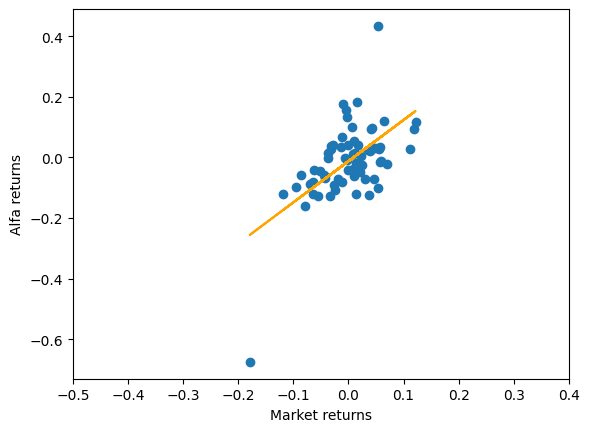

In [4]:
# Scatter plots can be misleading when ranges of X and Y are very different.
# In this case, Alfa had a very bad month in the COVID crisis with more than 60% loss!! 
# Then, we can re-do the scatter plot trying to make the X and Y axis using the same range of values 
plt.clf()
x = stock_returns['MXX']
y = stock_returns['ALFAA']
plt.scatter(x, y)
# Now I add the regression line:
b1,b0 = np.polyfit(x,y,1)
yfit = b0+b1*x

plt.plot(x, yfit,c="orange")

plt.xticks(np.arange(-0.50,0.5,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

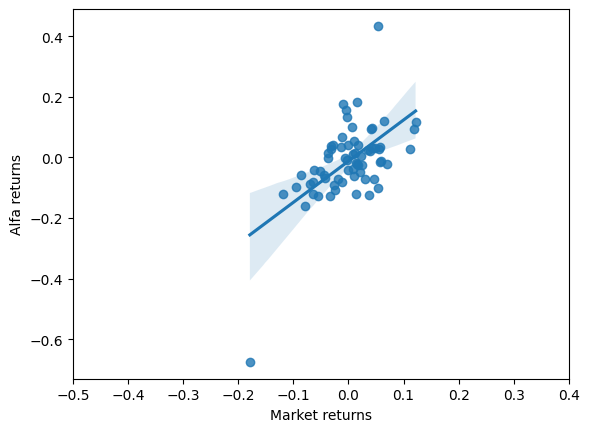

In [5]:
# Another faster way to plot a scatter and the regression line:
# I use the seaborn library:
import seaborn as sns
plt.clf()

sns.regplot(x=x, y=y)
plt.xticks(np.arange(-0.50,0.5,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

IT TELLS ME THAT THERE IS A POSITIVE RELATION BETWEEN ALFA AND IPC. THAT MEANS, THAT IF IPC INCREASES, I WOULD EXPECT THAT ALFA HAVE AN INCREASE, AS WELL. HOWEVER, I ALSO SEE SOME DOTS FAR AWAY FROM THE REGRESSION LINE, WHICH MEANS THAT SUCH POSITIVE RELATION IS NOT DETERMINISTIC.

IT SEEMS THAT THIS STOCK IS VERY SENSITIVE TO CHANGES IN THE MARKET RETURN SINCE THE SLOPE OF THE LINE SEEMS TO BE HIGHER THAN 1 (HIGHER THAN 45 DEGREES). FOR EACH +1% CHANGE IN THE MARKET RETURN, IT SEEMS THAT THE STOCK RETURNS MOVES MORE THAN +1%. BUT THE SAME WOULD HAPPEN IN NEGATIVE CHANGES; WHEN THE MARKET RETURN LOSES 1% (-1%), THEN THE STOCK RETURN IS EXPECTED TO LOSE MORE THAN 1%! THEN IT SEEMS THAT THE STOCK RETURN IS RISKIER THAN THE MARKET. WE WILL CHECK THIS BY LOOKING AT BETA1 IN THE REGRESSION OUTPUT!

### **4.2 Running the regression with the OLS method**

In [6]:
import statsmodels.api as sm
X = sm.add_constant(x)

mkmodel = sm.OLS(y,X).fit()
 
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     33.10
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           2.56e-07
Time:                        11:40:21   Log-Likelihood:                 57.957
No. Observations:                  67   AIC:                            -111.9
Df Residuals:                      65   BIC:                            -107.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0125      0.013     -0.991      0.3

In [7]:
# Another way to run the same model using the ols function (instead of the OLS function):
import statsmodels.formula.api as smf

mkmodel2 = smf.ols('ALFAA ~ MXX',data=sr).fit()
 
print(mkmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     33.12
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           2.55e-07
Time:                        11:45:03   Log-Likelihood:                 57.966
No. Observations:                  67   AIC:                            -111.9
Df Residuals:                      65   BIC:                            -107.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0125      0.013     -0.992      0.3

We can also estimate the OLS beta coefficients using matrix algebra:

In [8]:
# Using matrix algebra to estimate the beta coefficients:
stock_returns['constant'] = 1
selcols = ['constant','MXX']
x = stock_returns[selcols].values
y = stock_returns['ALFAA'].values

xtx = np.matmul(x.transpose(),x)
xty = np.matmul(x.transpose(),y)
invtxt = np.linalg.inv(xtx)

betas = np.matmul(invtxt,xty)
betas

array([-0.01252208,  1.35927464])

Writing the regression equation

In [10]:
print("The Regression Equation is: E[ALFAret] = ", betas[0],"+",betas[1],"* MXXret")

The Regression Equation is: E[ALFAret] =  -0.012522083440920612 + 1.359274635675816 * MXXret
